<a href="https://colab.research.google.com/github/Kirthivasan21/LGMVIP-DataScience-Task2/blob/main/Prediction_using_Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


# **Load the Iris dataset**

In [ ]:
iris  = load_iris()
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris.feature_names+['target'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
print(np.unique(iris.target)) # 0 --> setosa; 1 --> versicolor; 2 --> virginica
iris.target_names

[0 1 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
def get_name(x):
  if(x==0) :return 'Iris-setosa'
  elif(x==1) : return 'Iris-versicolor'
  else : return 'Iris-virginica'

df['target_name']  = df['target'].apply(get_name)
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,0.0,Iris-setosa
5,5.4,3.9,1.7,0.4,0.0,Iris-setosa
6,4.6,3.4,1.4,0.3,0.0,Iris-setosa
7,5.0,3.4,1.5,0.2,0.0,Iris-setosa
8,4.4,2.9,1.4,0.2,0.0,Iris-setosa
9,4.9,3.1,1.5,0.1,0.0,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
# Checking if there is any NaN value
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [ ]:
data = df.values
x_val = data[:, 0:4]
y_val = data[:,4]

In [ ]:
y_Data = np.array([np.average(x_val[:,i][y_val==j]) for i in range (x_val.shape[1]) for j in (np.unique(y_val))])
y_Data = y_Data.reshape(4,3)
y_Data = np.swapaxes(y_Data, 0, 1)
x_axis = np.arange(len(df.columns)-2)
width = 0.2

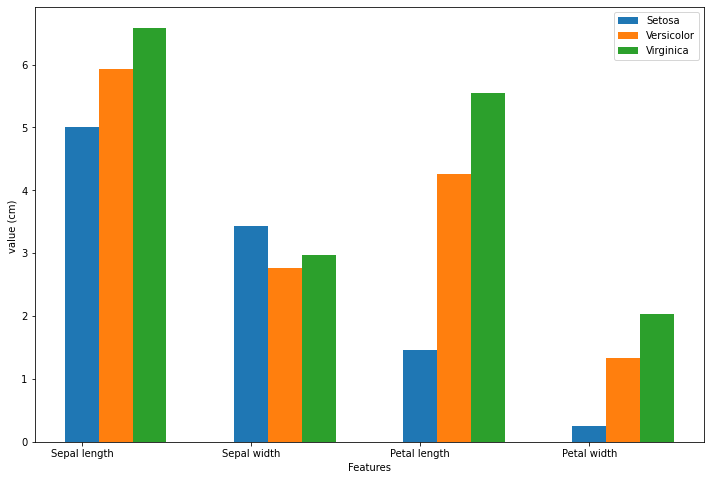

In [ ]:
plt.figure(figsize = (12,8))
plt.bar(x_axis, y_Data[0], width, label = 'Setosa')
plt.bar(x_axis+width, y_Data[1], width, label = 'Versicolor')
plt.bar(x_axis+width*2, y_Data[2], width, label = 'Virginica')

plt.xticks(x_axis,['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
plt.xlabel("Features")
plt.ylabel("value (cm) ")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# **Split the Dataset into Train & Test Data**

In [ ]:
x = df.drop(['target', 'target_name'], axis="columns")
y = df['target']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print("set size:", df.shape[0])
print("Train size:", len(x_train))
print("Test size:",len(x_test))

set size: 150
Train size: 112
Test size: 38


# **Decision TreeClassifier Model**

In [ ]:
model_dtc = DecisionTreeClassifier()
#feed the train data
model_dtc.fit(x_train, y_train)

DecisionTreeClassifier()

# **Model score**

In [ ]:
model_dtc.score(x_test, y_test)

0.9736842105263158

# **Average Model Score**

`cross_val_score function`

In [ ]:

from sklearn.model_selection import cross_val_score, ShuffleSplit
cv = ShuffleSplit(n_splits = 6, test_size=0.2)
arr = cross_val_score(DecisionTreeClassifier(), x,y,cv=cv)
print(list(arr))
print("Average Score:", np.mean(arr))

[0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.8666666666666667]
Average Score: 0.9333333333333332


# **Decision Tree Visualization**

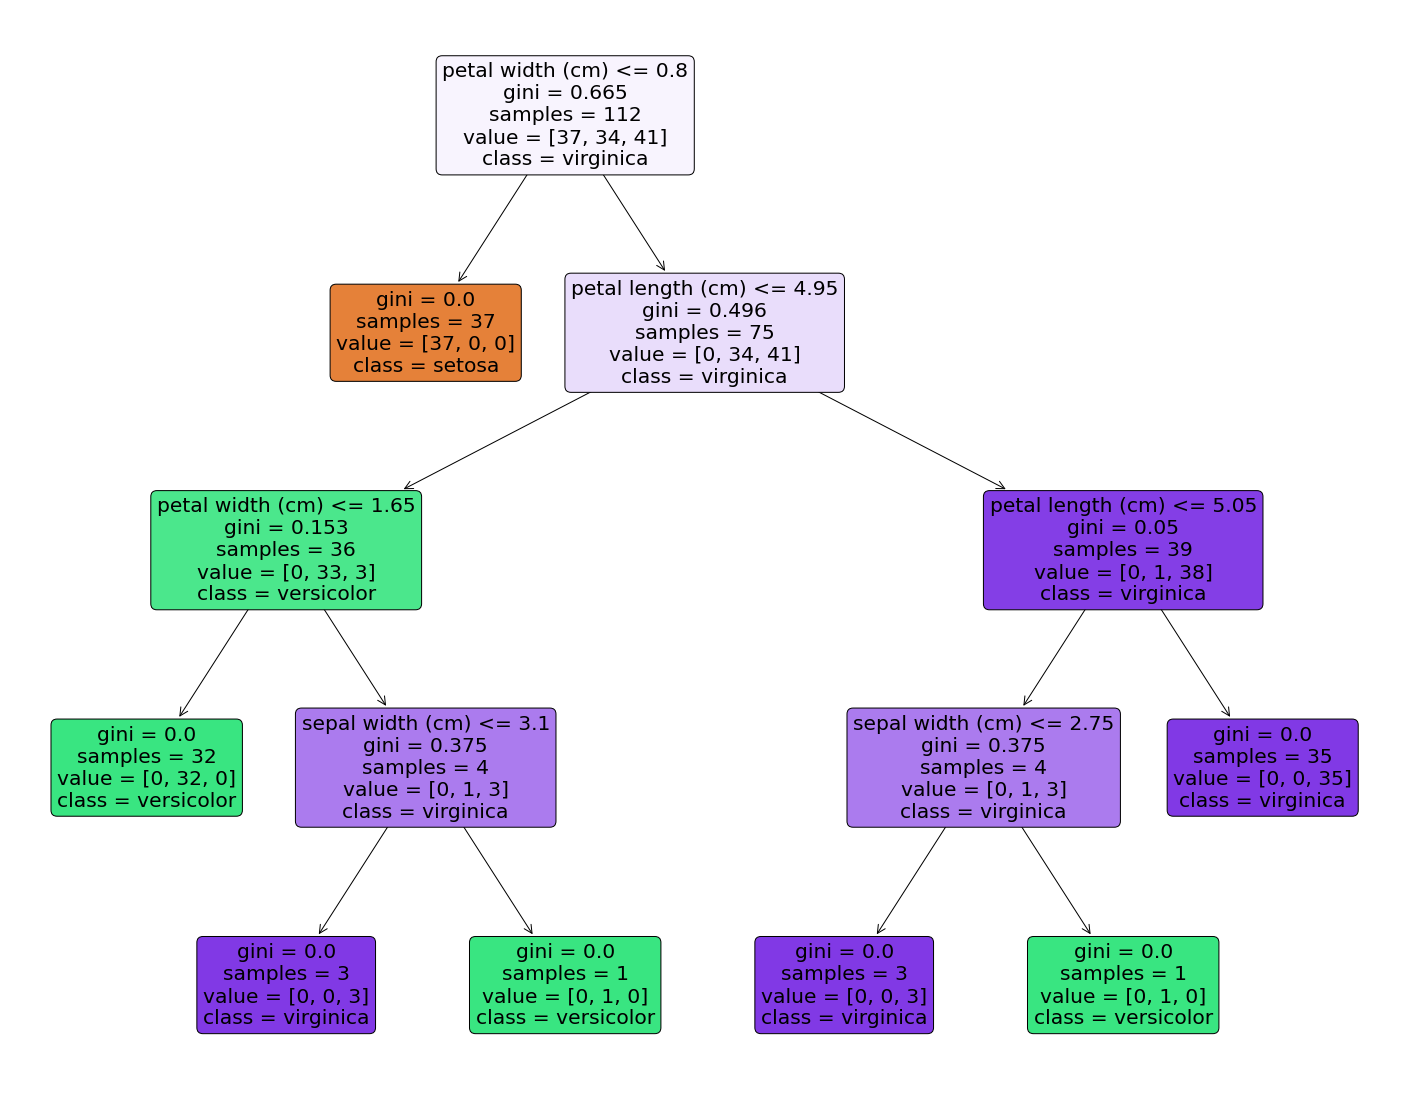

In [ ]:
fig = plt.figure(figsize=(25,20))
fig = plot_tree(model_dtc, 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded=True,
                filled = True)